In [2]:
### Tuan Nguyen
### DSC609 Module 7 Final Programming Assignment
### August 17, 2020

In [3]:
### PACKAGES ###

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import scipy


%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [4]:
### DATA ###
### The project data is from the Diabetics Prediction Dataset
### The dataset contains sections of data made available by the National Institute of Diabetes and Digestive and Kidney Diseases. 
### https://www.kaggle.com/kandij/diabetes-dataset

df = pd.read_csv(r'C:\Users\cg\Desktop\Echo\School\DSC609\Week 7\diabetes.csv')

In [5]:
### CHECK FOR NULL VALUES ###
df.isnull().values.any()

False

In [6]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
### BASIC EDA ###
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
### DATA PREPROCESSING ### 

df = df[df['Glucose'] > int(0)]
df = df[df['BloodPressure'] > int(0)]
df = df[df['SkinThickness'] > int(0)]
df = df[df['Insulin'] > int(0)]
df = df[df['BMI'] > int(0)]

### Filter data to remove instances with a "0" value in any of these columns: Glucose, BloodPressure, SkinThickness, Insulin, BMI.
### The reason for doing so is simply because it is a logical fallacy to have a value of zero in any of these columns

In [9]:
### BASIC STATISTICS AGAIN ###
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
### ASSIGN VARIABLES ###

X = df[['Pregnancies',
       'Glucose',
       'BloodPressure',
       'SkinThickness',
       'Insulin',
       'BMI',
       'DiabetesPedigreeFunction',
       'Age']].values

Y = df[['Outcome']].values.ravel()
Y = np.array(Y).astype(int)

from sklearn import preprocessing
X = preprocessing.scale(X)

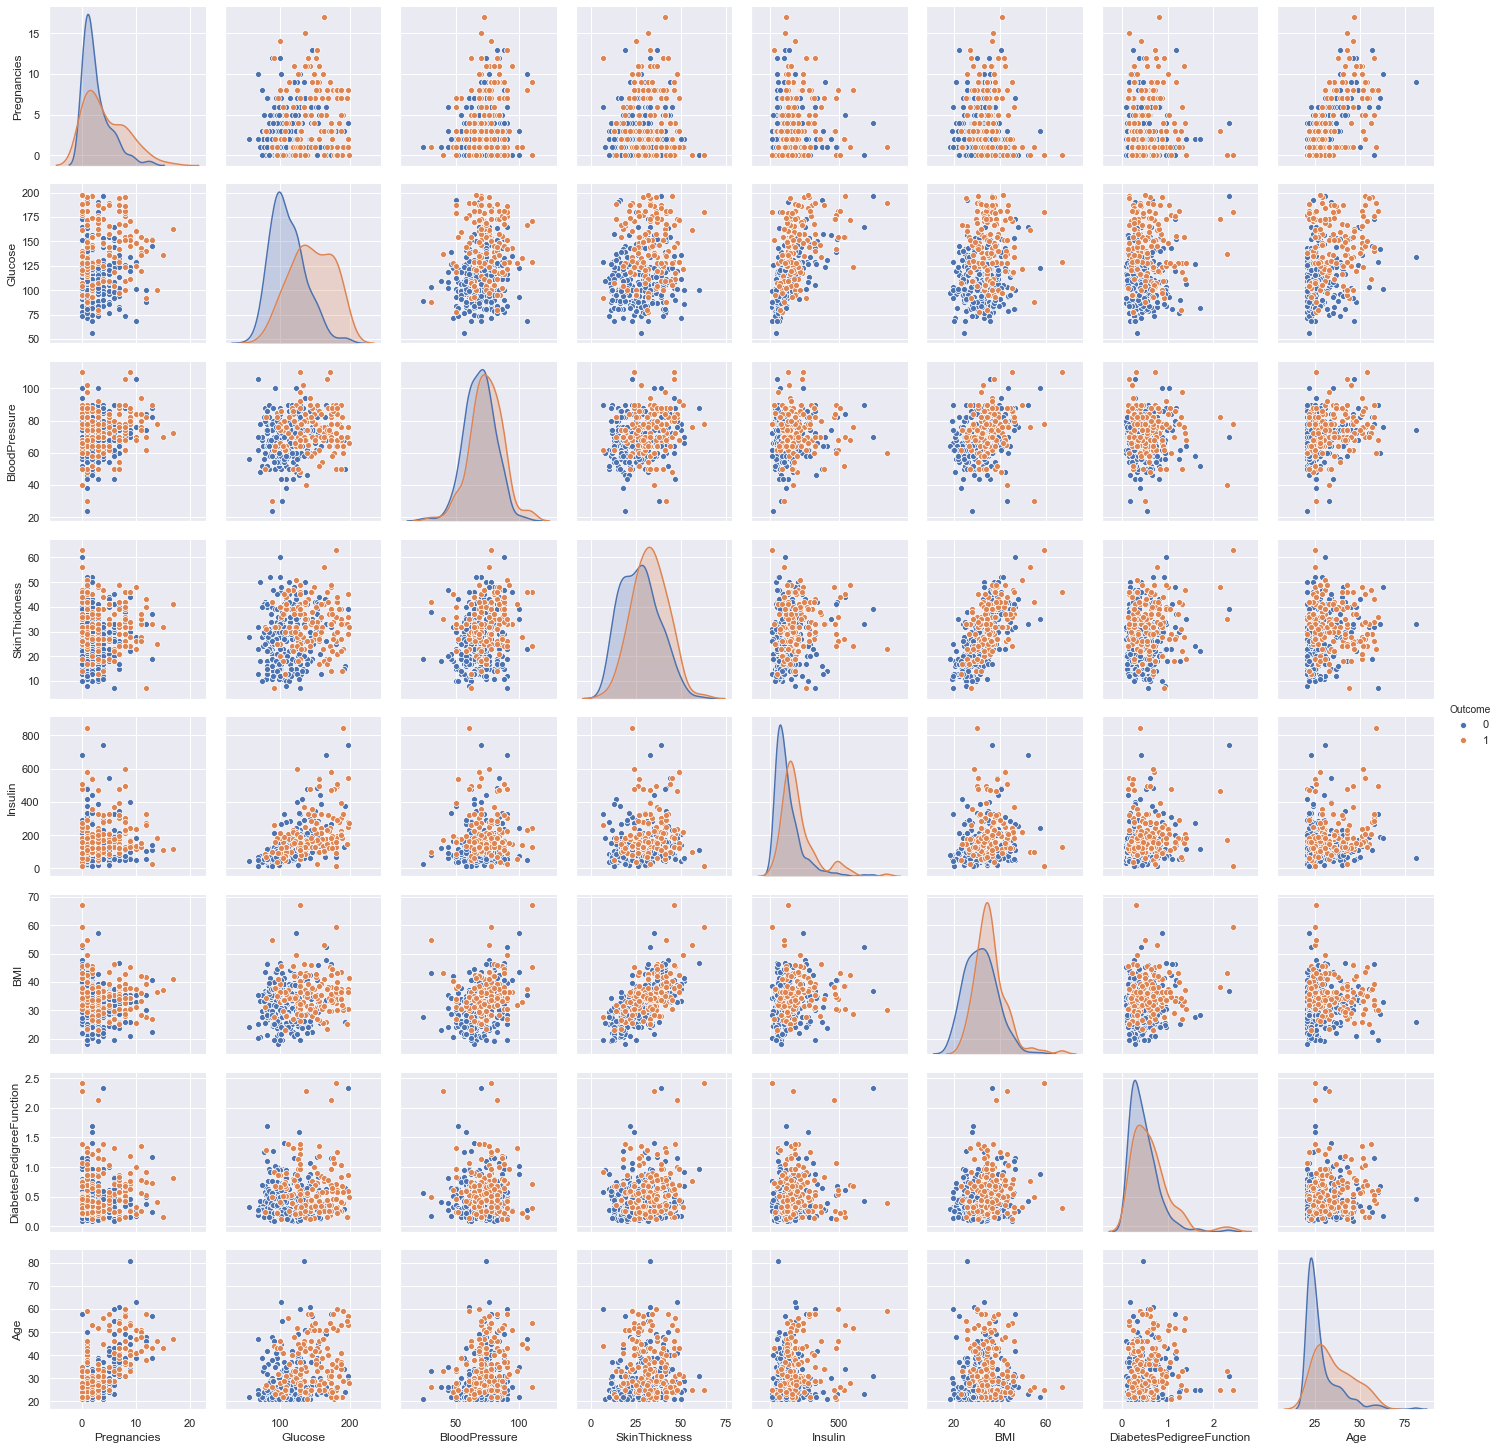

In [11]:
### VISUALIZATIONS ###

sns.set(style = 'darkgrid')
sns.pairplot(df, hue='Outcome')

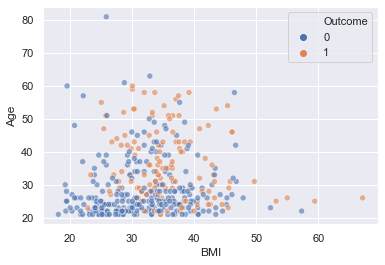

In [12]:
sns.scatterplot(data=df, x = 'BMI', y = 'Age', hue = 'Outcome', alpha=0.6)

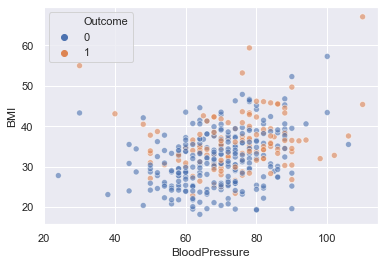

In [13]:
sns.scatterplot(data=df, x = 'BloodPressure', y = 'BMI', hue = 'Outcome', alpha=0.6)

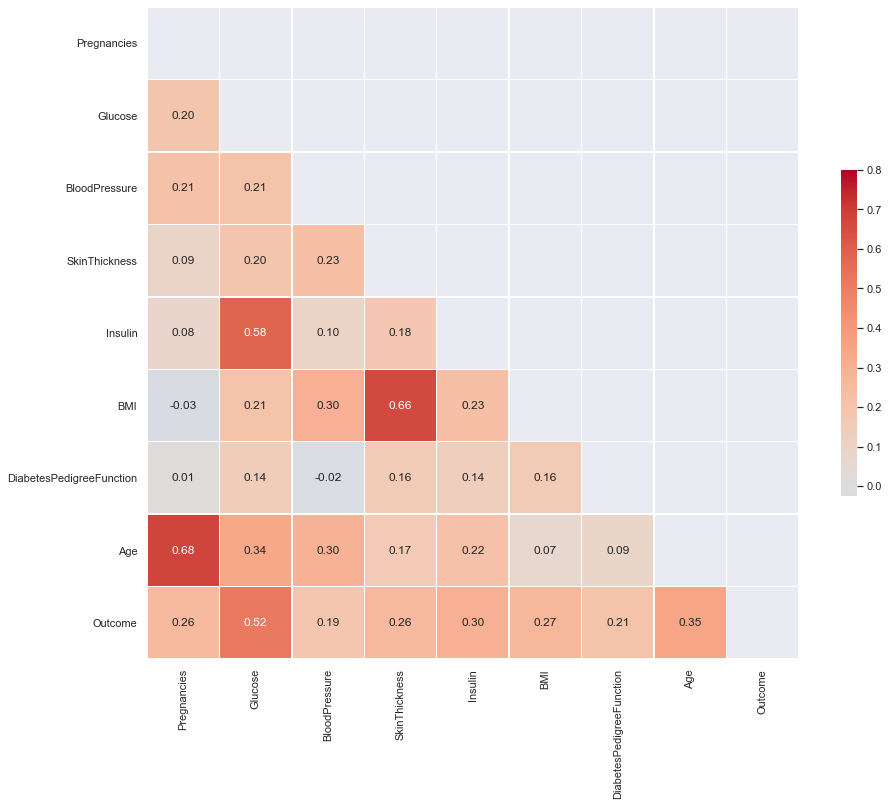

In [14]:
### CORRELATION TABLE ###

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.subplots(figsize=(15,12))

sns.heatmap(corr, mask=mask, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", cmap = 'coolwarm');

In [15]:
### CREATE MODELS ###

fold = model_selection.KFold(n_splits = 5, random_state = 2850)

### Import Multilayer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

### Create a neural network (Single Hidden Layer with 100 neurons)
### Use Stochastic Gradient Descent (SGD) as the estimating technique. 
NN1 = MLPClassifier(hidden_layer_sizes = (100,), 
                    solver = 'sgd', 
                    learning_rate_init = .05, 
                    max_iter = 1000)

NN1_Accuracy = cross_val_score(NN1, X, Y, scoring = 'accuracy', cv = fold).mean()

NN1_Accuracy

0.7682246024018176

In [16]:
### Create a second neural network, this time with a hyperbolic tangent function activation function.

NN2 = MLPClassifier(hidden_layer_sizes = (100,), 
                    activation = 'tanh', 
                    learning_rate_init = .05, 
                    max_iter = 1000)

NN2_Accuracy = cross_val_score(NN2, X, Y, scoring = 'accuracy', cv = fold).mean()

NN2_Accuracy

0.7324569944823109

In [17]:
### Create a third neural network, this time with a logistic activation function.

NN3 = MLPClassifier(hidden_layer_sizes = (100,), 
                    activation = 'logistic', 
                    learning_rate_init = .05, 
                    max_iter = 1000)

NN3_Accuracy = cross_val_score(NN3, X, Y, scoring = 'accuracy', cv = fold).mean()

NN3_Accuracy

0.7580006491398896